# Analysis of individual dog performace

## Data preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)

/tmp/ipykernel_10089/2691490471.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('races.csv')
df = df[df.team1.str.startswith('Wild')]
df = df.replace('unknown', np.nan)

df['time1'] = df['time1'].apply(lambda x: float(x) if x.replace('.','',1).isdigit() else x)
df['time2'] = df['time2'].apply(lambda x: float(x) if x.replace('.','',1).isdigit() else x)
df['time3'] = df['time3'].apply(lambda x: float(x) if x.replace('.','',1).isdigit() else x)
df['time4'] = df['time4'].apply(lambda x: float(x) if x.replace('.','',1).isdigit() else x)
df.shape

(1113, 21)

In [3]:
df_run1 = df[['name1', 'start_chng1', 'time1', 'hurdles']]
df_run2 = df[['name2', 'start_chng2', 'time2', 'hurdles']]
df_run3 = df[['name3', 'start_chng3', 'time3', 'hurdles']]
df_run4 = df[['name4', 'start_chng4', 'time4', 'hurdles']]

col_names = ['name', 'start_chng', 'time', 'hurdles']
df_run1.columns = col_names
df_run2.columns = col_names
df_run3.columns = col_names
df_run4.columns = col_names

df_run1 = df_run1.dropna()
df_run2 = df_run2.dropna()
df_run3 = df_run3.dropna()
df_run4 = df_run4.dropna()

df_run1 = df_run1[df_run1['time'].apply(lambda x: type(x) == str or x < 10)]
df_run2 = df_run2[df_run2['time'].apply(lambda x: type(x) == str or x < 10)]
df_run3 = df_run3[df_run3['time'].apply(lambda x: type(x) == str or x < 10)]
df_run4 = df_run4[df_run4['time'].apply(lambda x: type(x) == str or x < 10)]

df_run1 = df_run1[df_run1['start_chng'] < 20]
df_run2 = df_run2[df_run2['start_chng'] < 20]
df_run3 = df_run3[df_run3['start_chng'] < 20]
df_run4 = df_run4[df_run4['start_chng'] < 20]

df_runs_234 = pd.concat([df_run2, df_run3, df_run4], axis=0)

df_runs_all = pd.concat([df_run1, df_run2, df_run3, df_run4], axis=0)
df_runs_all.shape

(4430, 4)

In [4]:
df_dogs = pd.read_csv('dogs.csv')

df_dogs['birth'] = pd.to_datetime(df_dogs['birth'])
df_dogs['age'] = pd.Timestamp('2024-01-01') - df_dogs['birth']
df_dogs['age'] = df_dogs['age'] / pd.Timedelta(days=365)
df_dogs['runs'] = 0
df_dogs['wrong_start'] = 0
df_dogs['good_start'] = 0
df_dogs['total_start'] = 0.0
df_dogs['wrong_change'] = 0
df_dogs['good_change'] = 0
df_dogs['total_change'] = 0.0
df_dogs['total_time'] = 0.0
df_dogs['good_runs'] = 0
df_dogs['run_ins'] = 0
df_dogs['run_outside'] = 0

df_dogs.set_index('name', inplace=True)
df_dogs.head()

,trainer,breed,sex,neutered,birth,ulna_length,jump_height,age,runs,wrong_start,good_start,total_start,wrong_change,good_change,total_change,total_time,good_runs,run_ins,run_outside
name,,,,,,,,,,,,,,,,,,,
Dexter,TM800418,Kooikerhondje,M,Y,2010-02-14,14.05,25.0,13.887671,0,0,0,0.0,0,0,0.0,0.0,0,0,0
Jasper,NP950613,Border Collie,M,Y,2011-03-28,16.56,30.0,12.772603,0,0,0,0.0,0,0,0.0,0.0,0,0,0
Angie,UF830429,Border Collie,F,Y,2014-02-06,15.22,27.5,9.906849,0,0,0,0.0,0,0,0.0,0.0,0,0,0
Alex,ZE801127,Border Collie,M,Y,2014-04-22,17.95,32.5,9.701370,0,0,0,0.0,0,0,0.0,0.0,0,0,0
Ashley,DP910919,Border Collie,F,Y,2015-01-26,18.30,32.5,8.936986,0,0,0,0.0,0,0,0.0,0.0,0,0,0


In [5]:
for _, row in df_run1.iterrows():
    name, start, time, _ = row
    df_dogs.loc[name, 'runs'] += 1
    if time in ['run in', 'outside']:
        if time == 'run in':
            df_dogs.loc[name, 'run_ins'] += 1
        else:
            df_dogs.loc[name, 'run_outside'] += 1
    else:
        df_dogs.loc[name, 'good_runs'] += 1
        df_dogs.loc[name, 'total_time'] += time

    if start < 0:
        df_dogs.loc[name, 'wrong_start'] += 1
    else:
        df_dogs.loc[name, 'good_start'] += 1
        df_dogs.loc[name, 'total_start'] += start


for _, row in df_runs_234.iterrows():
    name, change, time, _ = row
    df_dogs.loc[name, 'runs'] += 1
    if time in ['run in', 'outside']:
        if time == 'run in':
            df_dogs.loc[name, 'run_ins'] += 1
        else:
            df_dogs.loc[name, 'run_outside'] += 1
    else:
        df_dogs.loc[name, 'good_runs'] += 1
        df_dogs.loc[name, 'total_time'] += time

    if change < 0:
        df_dogs.loc[name, 'wrong_change'] += 1
    else:
        df_dogs.loc[name, 'good_change'] += 1
        df_dogs.loc[name, 'total_change'] += change

df_dogs.head(10)

,trainer,breed,sex,neutered,birth,ulna_length,jump_height,age,runs,wrong_start,good_start,total_start,wrong_change,good_change,total_change,total_time,good_runs,run_ins,run_outside
name,,,,,,,,,,,,,,,,,,,
Dexter,TM800418,Kooikerhondje,M,Y,2010-02-14,14.05,25.0,13.887671,80,3,30,3.630,5,42,12.89,363.17,79,0,1
Jasper,NP950613,Border Collie,M,Y,2011-03-28,16.56,30.0,12.772603,40,0,9,3.120,3,28,12.50,220.56,37,0,3
Angie,UF830429,Border Collie,F,Y,2014-02-06,15.22,27.5,9.906849,33,0,4,0.390,3,26,19.12,177.42,31,1,1
Alex,ZE801127,Border Collie,M,Y,2014-04-22,17.95,32.5,9.701370,130,0,16,1.568,6,108,19.14,551.22,129,0,1
Ashley,DP910919,Border Collie,F,Y,2015-01-26,18.30,32.5,8.936986,63,0,0,0.000,3,60,31.16,265.63,62,1,0
Bella,OJ941014,American Staffordshire Terrier,F,Y,2015-02-27,14.70,25.0,8.849315,159,0,0,0.000,18,141,48.49,740.86,157,0,2
Gordon,HO800728,Jack Russell Terrier,M,Y,2015-04-12,9.67,15.0,8.728767,116,2,2,0.640,8,104,44.36,803.07,115,0,1
Negro,UR870607,Mix,M,Y,2015-04-14,15.77,27.5,8.723288,84,10,16,2.820,5,53,24.09,421.07,84,0,0
Fibo,RK871018,Magyar Vizsla,M,Y,2015-05-21,17.99,32.5,8.621918,0,0,0,0.000,0,0,0.00,0.00,0,0,0


In [6]:
df_dogs.runs.sum()

4430

In [7]:
df_dogs = df_dogs[df_dogs['runs'] >= 20]                                   # I drop all dogs with less than 20 runs
df_dogs['wrong_start_ratio'] = df_dogs['wrong_start'] / df_dogs['runs'] * 100
df_dogs['wrong_change_ratio'] = df_dogs['wrong_change'] / df_dogs['runs'] * 100
df_dogs['run_in_ratio'] = df_dogs['run_ins'] / df_dogs['runs'] * 100
df_dogs['run_outside_ratio'] = df_dogs['run_outside'] / df_dogs['runs'] * 100
df_dogs['avg_start'] = df_dogs['total_start'] / df_dogs['good_start']
df_dogs['avg_change'] = df_dogs['total_change'] / df_dogs['good_change']
df_dogs['avg_time'] = df_dogs['total_time'] / df_dogs['good_runs']
df_dogs.head(10)

,trainer,breed,sex,neutered,birth,ulna_length,jump_height,age,runs,wrong_start,good_start,total_start,wrong_change,good_change,total_change,total_time,good_runs,run_ins,run_outside,wrong_start_ratio,wrong_change_ratio,run_in_ratio,run_outside_ratio,avg_start,avg_change,avg_time
name,,,,,,,,,,,,,,,,,,,,,,,,,,
Dexter,TM800418,Kooikerhondje,M,Y,2010-02-14,14.05,25.0,13.887671,80,3,30,3.630,5,42,12.89,363.17,79,0,1,3.750000,6.250000,0.000000,1.250000,0.121000,0.306905,4.597089
Jasper,NP950613,Border Collie,M,Y,2011-03-28,16.56,30.0,12.772603,40,0,9,3.120,3,28,12.50,220.56,37,0,3,0.000000,7.500000,0.000000,7.500000,0.346667,0.446429,5.961081
Angie,UF830429,Border Collie,F,Y,2014-02-06,15.22,27.5,9.906849,33,0,4,0.390,3,26,19.12,177.42,31,1,1,0.000000,9.090909,3.030303,3.030303,0.097500,0.735385,5.723226
Alex,ZE801127,Border Collie,M,Y,2014-04-22,17.95,32.5,9.701370,130,0,16,1.568,6,108,19.14,551.22,129,0,1,0.000000,4.615385,0.000000,0.769231,0.098000,0.177222,4.273023
Ashley,DP910919,Border Collie,F,Y,2015-01-26,18.30,32.5,8.936986,63,0,0,0.000,3,60,31.16,265.63,62,1,0,0.000000,4.761905,1.587302,0.000000,NaN,0.519333,4.284355
Bella,OJ941014,American Staffordshire Terrier,F,Y,2015-02-27,14.70,25.0,8.849315,159,0,0,0.000,18,141,48.49,740.86,157,0,2,0.000000,11.320755,0.000000,1.257862,NaN,0.343901,4.718854
Gordon,HO800728,Jack Russell Terrier,M,Y,2015-04-12,9.67,15.0,8.728767,116,2,2,0.640,8,104,44.36,803.07,115,0,1,1.724138,6.896552,0.000000,0.862069,0.320000,0.426538,6.983217
Negro,UR870607,Mix,M,Y,2015-04-14,15.77,27.5,8.723288,84,10,16,2.820,5,53,24.09,421.07,84,0,0,11.904762,5.952381,0.000000,0.000000,0.176250,0.454528,5.012738
Agnes,PO831026,Border Collie,F,Y,2015-09-24,18.02,32.5,8.276712,33,0,0,0.000,5,28,29.43,160.50,32,1,0,0.000000,15.151515,3.030303,0.000000,NaN,1.051071,5.015625


# Number of races per dog

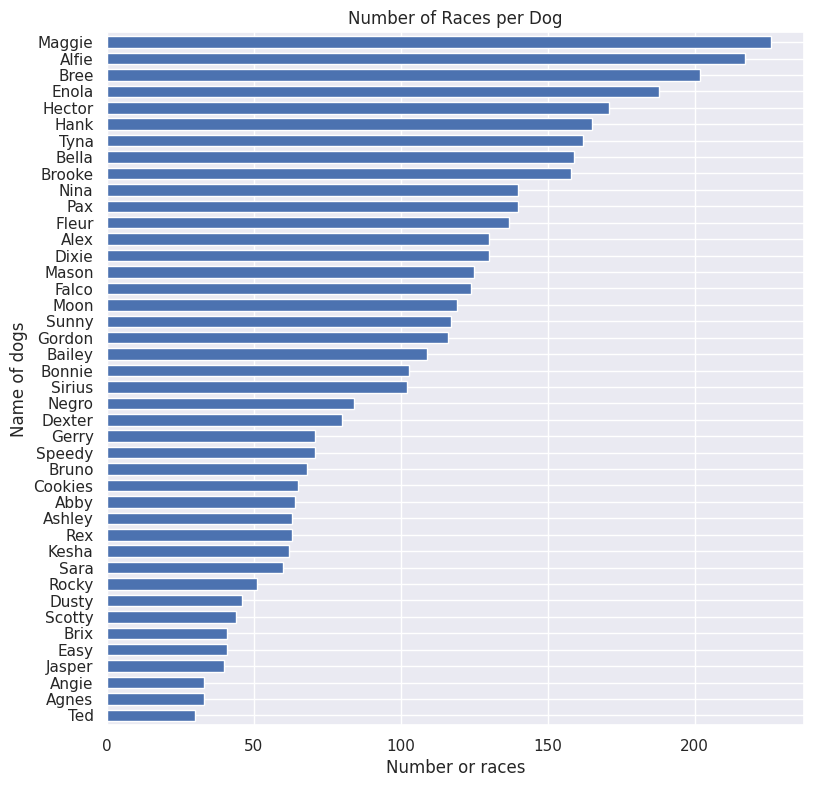

In [8]:
sns.set_theme(rc={"figure.figsize": (9,9)})
df_dogs['runs'].sort_values(ascending=True).plot.barh(width=0.7)
plt.xlabel('Number or races')
plt.ylabel('Name of dogs')
plt.title('Number of Races per Dog')
plt.show()

## Average run time per dog

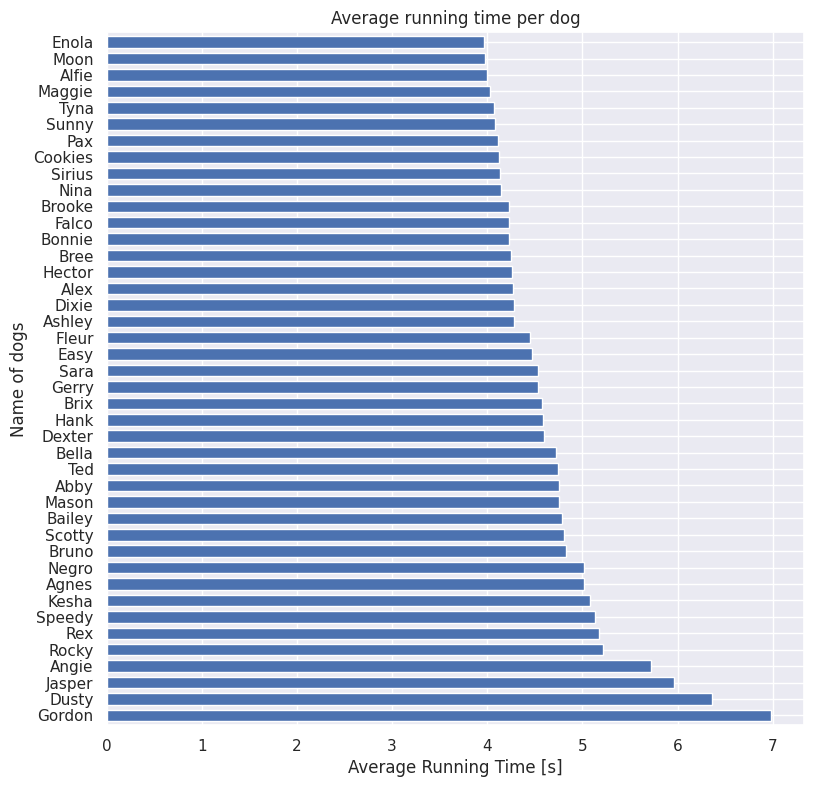

In [9]:
df_dogs['avg_time'].sort_values(ascending=False).plot.barh(width=0.7)
plt.xlabel('Average Running Time [s]')
plt.ylabel('Name of dogs')
plt.title('Average running time per dog')
plt.show()

## Fastest five dogs

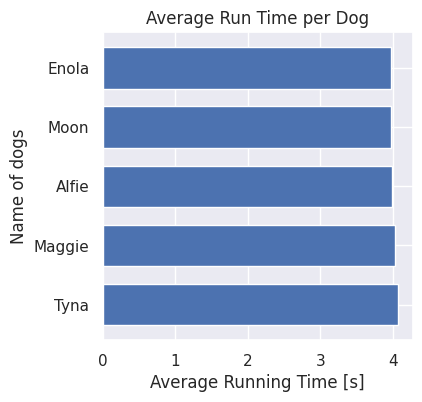

In [10]:
sns.set_theme(rc={"figure.figsize": (4,4)})
df_dogs['avg_time'].sort_values(ascending=False).tail(5).plot.barh(width=0.7)
plt.xlabel('Average Running Time [s]')
plt.ylabel('Name of dogs')
plt.title('Average Run Time per Dog')
plt.show()

## Slowest five dogs

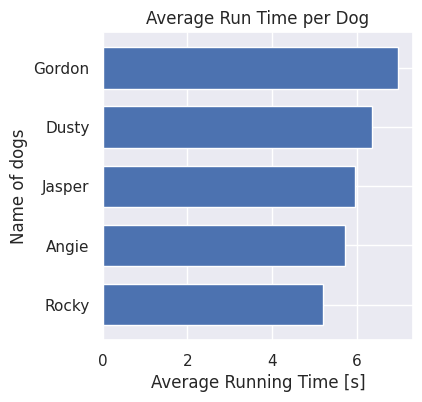

In [11]:
sns.set_theme(rc={"figure.figsize": (4,4)})
df_dogs['avg_time'].sort_values(ascending=True).tail(5).plot.barh(width=0.7)
plt.xlabel('Average Running Time [s]')
plt.ylabel('Name of dogs')
plt.title('Average Run Time per Dog')
plt.show()

## Ratio of wrong starts

Indicating dogs with at least one correct start and more than 10% of wrong starts

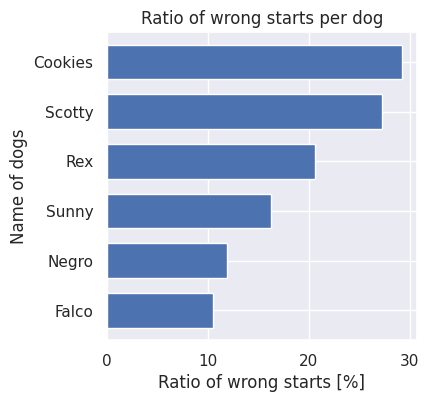

In [12]:
sns.set_theme(rc={"figure.figsize": (4,4)})
df_dogs[(df_dogs.good_start > 0) & (df_dogs.wrong_start_ratio > 10)]['wrong_start_ratio'].sort_values(ascending=True).plot.barh(width=0.7)
plt.xlabel('Ratio of wrong starts [%]')
plt.ylabel('Name of dogs')
plt.title('Ratio of wrong starts per dog')
plt.show()

## Ratio of wrong changes

Indicating dogs with at least one correct change and more than 10% of wrong changes

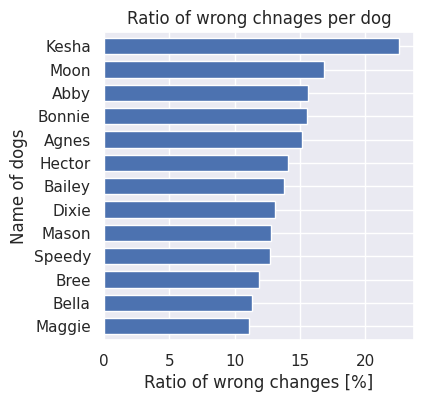

In [13]:
sns.set_theme(rc={"figure.figsize": (4,4)})
df_dogs[(df_dogs.good_change > 0) & (df_dogs.wrong_change_ratio > 10)]['wrong_change_ratio'].sort_values(ascending=True).plot.barh(width=0.7)
plt.xlabel('Ratio of wrong changes [%]')
plt.ylabel('Name of dogs')
plt.title('Ratio of wrong chnages per dog')
plt.show()

## Average start time

Indicating dogs with at least one correct start

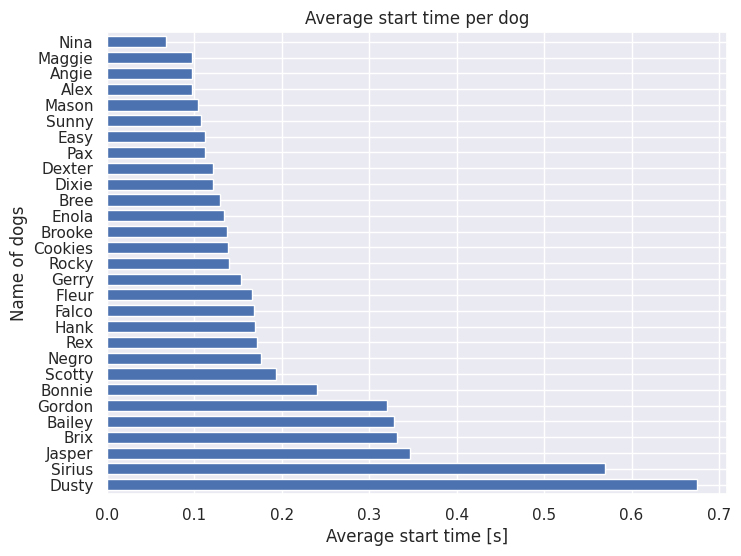

In [14]:
sns.set_theme(rc={"figure.figsize": (8, 6)})
df_dogs[df_dogs.good_start > 0]['avg_start'].sort_values(ascending=False).plot.barh(width=0.7)
plt.xlabel('Average start time [s]')
plt.ylabel('Name of dogs')
plt.title('Average start time per dog')
plt.show()

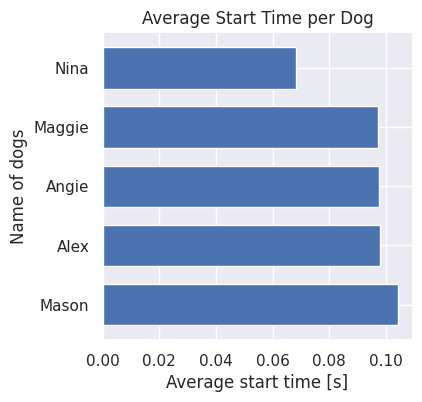

In [15]:
sns.set_theme(rc={"figure.figsize": (4,4)})
df_dogs[df_dogs.good_start > 0]['avg_start'].sort_values(ascending=False).tail(5).plot.barh(width=0.7)
plt.xlabel('Average start time [s]')
plt.ylabel('Name of dogs')
plt.title('Average Start Time per Dog')
plt.show()

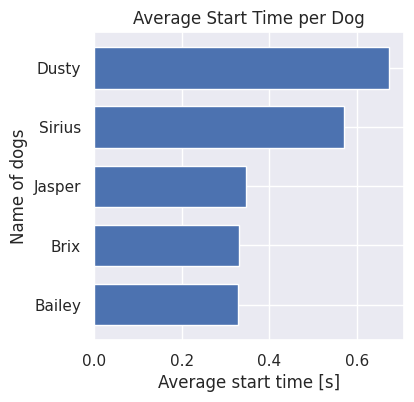

In [16]:
sns.set_theme(rc={"figure.figsize": (4,4)})
df_dogs[df_dogs.good_start > 0]['avg_start'].sort_values(ascending=True).tail(5).plot.barh(width=0.7)
plt.xlabel('Average start time [s]')
plt.ylabel('Name of dogs')
plt.title('Average Start Time per Dog')
plt.show()

## Average change time

Indicating dogs with at least one correct change

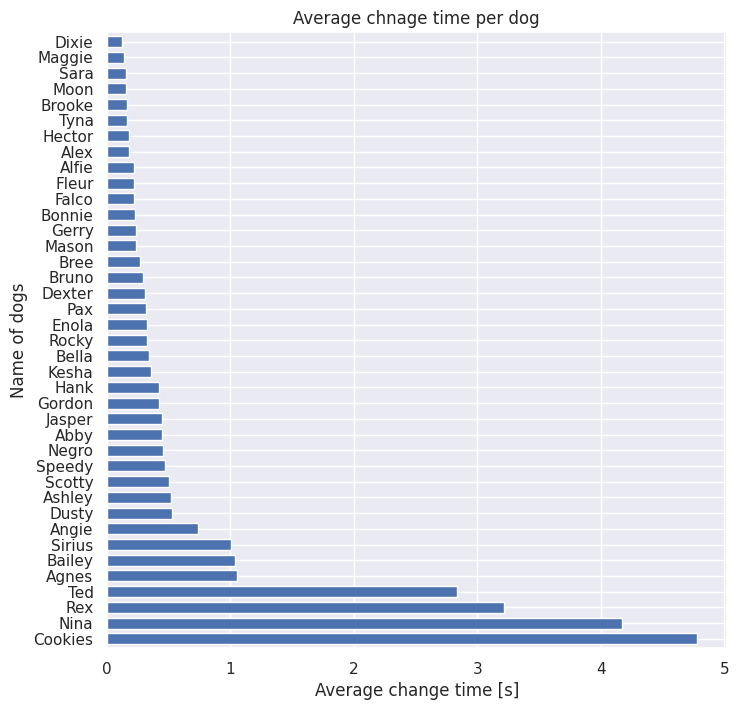

In [17]:
sns.set_theme(rc={"figure.figsize": (8, 8)})
df_dogs[df_dogs.good_change > 0]['avg_change'].sort_values(ascending=False).plot.barh(width=0.7)
plt.xlabel('Average change time [s]')
plt.ylabel('Name of dogs')
plt.title('Average chnage time per dog')
plt.show()

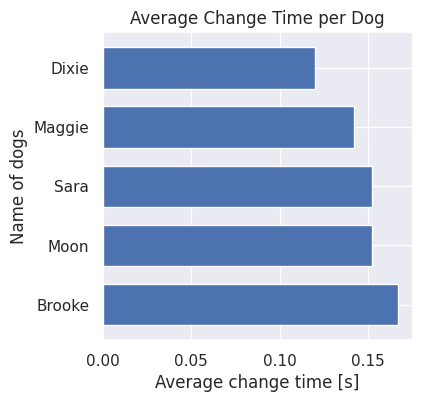

In [18]:
sns.set_theme(rc={"figure.figsize": (4,4)})
df_dogs[df_dogs.good_change > 0]['avg_change'].sort_values(ascending=False).tail(5).plot.barh(width=0.7)
plt.xlabel('Average change time [s]')
plt.ylabel('Name of dogs')
plt.title('Average Change Time per Dog')
plt.show()

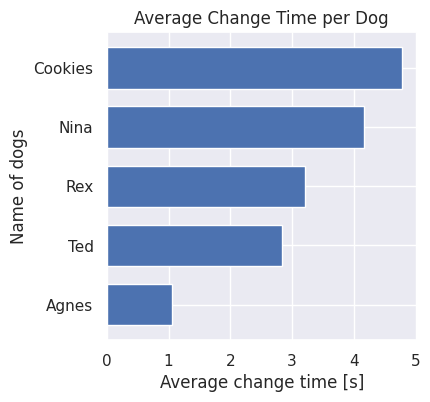

In [19]:
sns.set_theme(rc={"figure.figsize": (4,4)})
df_dogs[df_dogs.good_change > 0]['avg_change'].sort_values(ascending=True).tail(5).plot.barh(width=0.7)
plt.xlabel('Average change time [s]')
plt.ylabel('Name of dogs')
plt.title('Average Change Time per Dog')
plt.show()

## Run in ratio

The ratio of run in errors compared to all runs

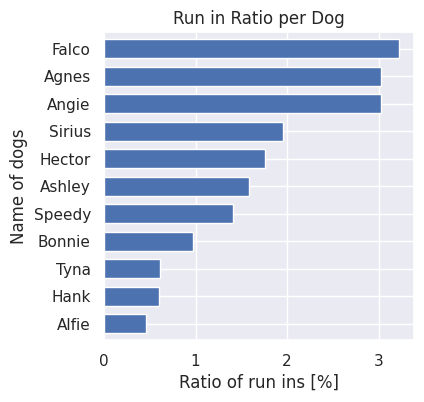

In [20]:
sns.set_theme(rc={"figure.figsize": (4,4)})
df_dogs[df_dogs.run_in_ratio > 0]['run_in_ratio'].sort_values(ascending=True).plot.barh(width=0.7)
plt.xlabel('Ratio of run ins [%]')
plt.ylabel('Name of dogs')
plt.title('Run in Ratio per Dog')
plt.show()

## Run outside ratio

The ratio of run outside errors compared to all runs

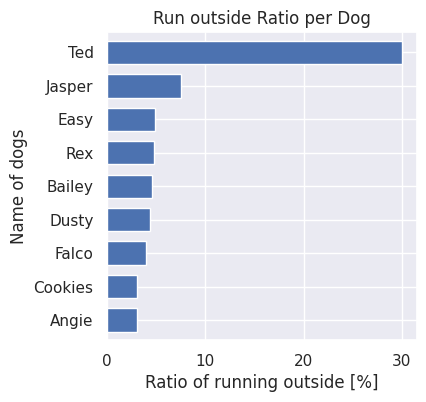

In [21]:
sns.set_theme(rc={"figure.figsize": (4,4)})
df_dogs[df_dogs.run_outside_ratio > 3]['run_outside_ratio'].sort_values(ascending=True).plot.barh(width=0.7)
plt.xlabel('Ratio of running outside [%]')
plt.ylabel('Name of dogs')
plt.title('Run outside Ratio per Dog')
plt.show()

In [22]:
df_dogs.to_csv('dogs_stats.csv')

In [23]:
df_merged = df_runs_all.merge(df_dogs, left_on='name', right_index=True, how='left')
df_merged = df_merged[df_merged['time'].apply(type) == float]
df_merged = df_merged[df_merged['hurdles'].apply(type) == float]
df_merged = df_merged.dropna()
df_merged.head()

,name,start_chng,time,hurdles,trainer,breed,sex,neutered,birth,ulna_length,jump_height,age,runs,wrong_start,good_start,total_start,wrong_change,good_change,total_change,total_time,good_runs,run_ins,run_outside,wrong_start_ratio,wrong_change_ratio,run_in_ratio,run_outside_ratio,avg_start,avg_change,avg_time
1,Brooke,-0.11,4.08,25.0,MJ930217,Border Collie,M,N,2021-10-20,17.08,30.0,2.200000,158.0,13.0,96.0,13.246,4.0,45.0,7.50,667.47,158.0,0.0,0.0,8.227848,2.531646,0.0,0.0,0.137979,0.166667,4.224494
3,Brooke,-0.63,4.25,25.0,MJ930217,Border Collie,M,N,2021-10-20,17.08,30.0,2.200000,158.0,13.0,96.0,13.246,4.0,45.0,7.50,667.47,158.0,0.0,0.0,8.227848,2.531646,0.0,0.0,0.137979,0.166667,4.224494
5,Brooke,-0.59,4.28,25.0,MJ930217,Border Collie,M,N,2021-10-20,17.08,30.0,2.200000,158.0,13.0,96.0,13.246,4.0,45.0,7.50,667.47,158.0,0.0,0.0,8.227848,2.531646,0.0,0.0,0.137979,0.166667,4.224494
6,Enola,0.20,3.87,27.5,BV810323,Border Collie,F,Y,2017-05-31,18.06,32.5,6.591781,188.0,15.0,140.0,18.744,1.0,32.0,10.36,745.90,188.0,0.0,0.0,7.978723,0.531915,0.0,0.0,0.133886,0.323750,3.967553
8,Enola,0.12,3.93,27.5,BV810323,Border Collie,F,Y,2017-05-31,18.06,32.5,6.591781,188.0,15.0,140.0,18.744,1.0,32.0,10.36,745.90,188.0,0.0,0.0,7.978723,0.531915,0.0,0.0,0.133886,0.323750,3.967553


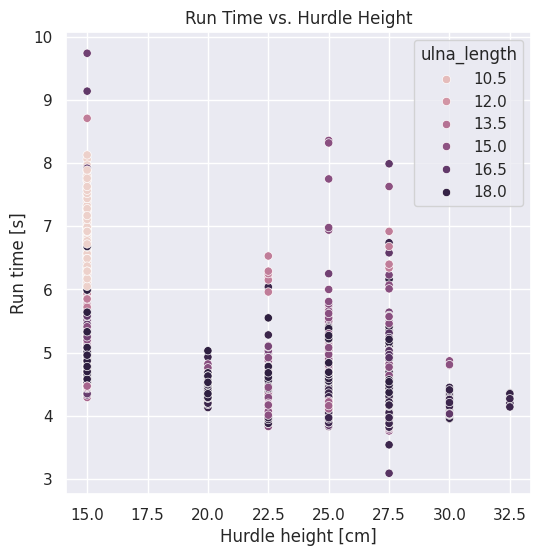

In [24]:
sns.set_theme(rc={"figure.figsize": (6,6)})
sns.scatterplot(data=df_merged, x='hurdles', y='time', hue='ulna_length')
plt.xlabel('Hurdle height [cm]')
plt.ylabel('Run time [s]')
plt.title('Run Time vs. Hurdle Height')
plt.show()

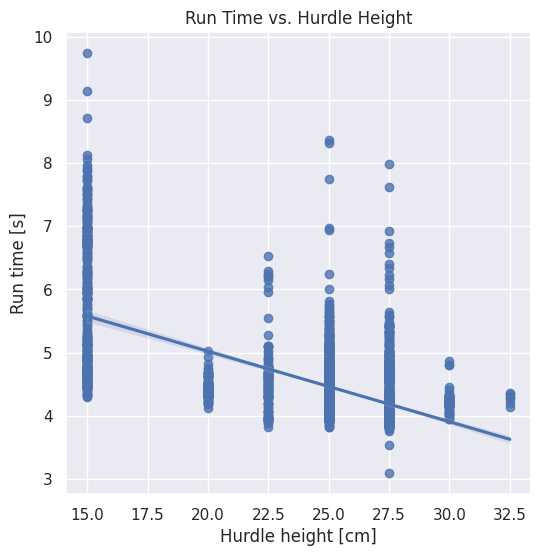

In [25]:
# Convert the columns to numeric type (this will convert non-numeric values to NaN)
df_merged['hurdles'] = pd.to_numeric(df_merged['hurdles'], errors='coerce')
df_merged['time'] = pd.to_numeric(df_merged['time'], errors='coerce')

# Remove rows with NaN values in the 'hurdles' and 'time' columns
df_merged = df_merged.dropna(subset=['hurdles', 'time'])

# Now you can plot your data
sns.regplot(data=df_merged, x='hurdles', y='time')
plt.xlabel('Hurdle height [cm]')
plt.ylabel('Run time [s]')
plt.title('Run Time vs. Hurdle Height')
plt.show()

In [26]:
slope, intercept = np.polyfit(df_merged['hurdles'], df_merged['time'], 1)
print(f'Slope: {slope}, Intercept: {intercept}')

Slope: -0.11153269472759812, Intercept: 7.2520777321765575
